# Openhole Logs in High-Temperature Geothermal Wells

Openhole logs are run before the liner to measure properties of the formation and borehole wall.  

<img src="images/wellsite.jpg" alt="Drawing" style="width: 300px;"/> <img src="images/logging-truck-inside-data.jpg" alt="Drawing" style="width: 300px;"/> <img src="images/tool-check.jpg" alt="Drawing" style="width: 300px;"/> 

## Why acquire openhole logs?

Much of what we know about the subsurface in a geothermal reservoir comes from analysing drill cuttings that are carried to surface by the drilling fluids. These tiny chips of hydrothermally altered rock travel for kilometres inside an annular space of varying width and often entrained in liquid with poor lifting capacity. So it's no surprise that samples may be mixed, difficult to interpret, or suffer from poor depth calibration.

<img src="images/rocks-for-geologist-01.png" alt="Drawing" style="width: 400px;"/>

Depending on the magnitude of permeability encountered and the drilling system type (water, air-water mix, or air), cuttings and drilling fluids may disappear into the formation rather than returning to surface. 

<img src="images/rocks-for-geologist-02.png" alt="Drawing" style="width: 400px;"/>

Openhole logs can be used to depth correct the geologic sequence or reconstruct intervals with no returns using:
- The variation of rock properties revealed by petrophysical logs (e.g., gamma, bulk resistivity, sonic, neutron density, etc: Wallis et al. 2012)
- The rock textures captured by micro-resistivy imagers, which is especially useful in volcanic rocks and rocks where hydrothermal alteration obscures the original lithology (Halwera et al. 2013, Wallis et al. 2020) 
- Variation in acoustic amplitude detected by acoustic borehole imagers may resolve some lithological changes (Massiot et al. 2015) 

Although acquisition of borehole image logs have recently become more common-place in the geothermal industry, petrophysical logs are rarely acquired (aside from gamma which is often partnered with borehole imagers and some pressure - temperature - spinner tools). Petrophysical logs can be run in the same tool string as borehole imagers or as a separate run immediately following the imager. Therefore, there may be minimal additional cost over the cost of running a borehole imager, especally when the program as a whole is considered (i.e., procurement, mobilisation, rig time and interpretation). Petrophysical logs provide significant value to those who seek to accurately resolve the geologic sequence (Wallis et al. 2012) and quantify reservoir properties (Durán et al. 2019), so their use will likely also increase in the coming years. 

## Micro-resistivity imagers and factors that impact log quality

Micro-resistivity imagers are pad-based tools that make contact with the borehole wall and generate an image made of stripes. The tool pictured below had just completed nearly 1000 m of logging in abrasive volcanic rock with a similar degree of pad-wear as caused by logging a sand-shale sequence.

<img src="images/FMI-tool.jpg" alt="Drawing" style="width: 400px;"/>

Tools vary in terms of pad number and therefore circumferential borehole coverage. Large completion sizes or irregular pad spacing caused by tool centralisation issues will increase the whitespace in micro-resistity borehole images. This subsequently reduces azimuthal confidence of fractures picked and our ability to resolve geomechanical features like borehole breakout and tensile fractures. This means that, while micro-resistivity images provide invaluable textural information that enables us to further resolve lithological sequences, acoustic borehole images are more suited to geomechanical studies.

Oversized or ovoid hole exasperates these coverage issues and, where pads lose contact with the borehole wall, it may lead to total image loss. However, micro-resistivity logs are less impacted by these conditions than acoustic logs because pads will maintain contact with the borehole wall in circumstances that would have already resulted in signal loss for an acoustic tool. Artefacts associated with sudden changes in logging speed and extreme resistivity contrast between mud and the borehole wall may also negatively impact readability of micro-resistivity images. Some of these artefacts can be improved during post-processing if the log software includes speed correction. Best practice is to quantify and plot image quality along with fracture data so as to discern the variation that is simply due to the image quality.  

## Interpreting micro-resistivity images acquired in high-temperature, volcanic-hosted geothermal reservoirs

Interpretation methodologies for micro-resistivity images acquired in low temperature sand-shale, carbonate and bedrock environments are well established. There are three additional factors that merit consideration when interpreting logs acquired in geothermal reservoirs: 

1. Thermal stress
2. Hydrothermal alteration
3. Textures of volcanic rocks

<img src="images/log-images.png" alt="Drawing" style="width: 1200px;"/>

The figure above is adapted from Wallis et al. (2020). It illustrates a range of features recognised in micro-resistivity image logs acquired in a high-temperature geothermal reservoir. Note that relative electrical resistivity of the borehole wall is plotted from conductive (dark) to resistive (light): 
1. The azimuth of drilling induced tensile fractures rotate as the well passes through an an almost 1 m thick fault (brown arrow). 
2. En echelon drilling-induced tensile fractures interact with a drilling enhanced natural fracture (black arrow). 
3. Parallel, low-amplitude conductive (dark) sinusoids along andesite flow banding are likely to be only open at the borehole wall in response to thermally-amplified tensile hoop stress (i.e., are thermally induced fractures). 
4. Bright halos (e.g., dark brown arrow) indicate current accumulation around fractures filled with highly conductive minerals (e.g., pyrite) and, less commonly, disseminated alteration within particular geologic layers (blue arrow). 
5. A volcaniclastic unit that was not recognisable in cuttings because it is dominantly comprised of large (>20 cm) andesite clasts in fine grained, likely clay-rich, matrix.

# The impact of thermal stress on the wellbore wall

Due to the large difference between mud and reservoir temperature, geothermal wells experience significant thermal stresses during drilling and testing. The model below illustrates how thermal stress impacts hoop stresses resolved onto the well and influences the formation of drilling-induced damage (borehole breakout and tensile fractures). 

<img src="images/hoop-stress-01.png" alt="Drawing" style="width: 1200px;"/>

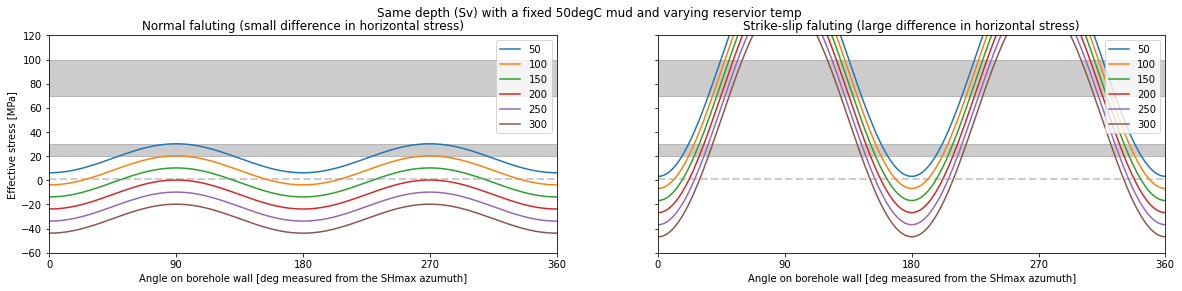

In [12]:
# ============================================
# Model of thermal stress at the borehole wall
# ============================================
'''
Kirsh (1898) equations are used to calculate the stresses resolved onto the wall of 
a borehole. In this case, the borehole is vertical (i.e., the borehole axis is 
parallel to the vertical component of the stress tensor so the plots reflect the 
various influence of the two horizontal stresses as we move around the borehole wall. 
Equations as presented in Jager et al. (2007) and Zoback (2010).
'''
import numpy as np
import matplotlib.pyplot as plt
import functions as fun

# Thermal Stress Magnatude
# ------------------------
'''
Calculate the magnitude of thermally induced stress [MPa] for a  
range of reservoir temperatures and assuming steady state conditions.
The convention of - as tensile and + as compressive is used here.
The thermal stress is subtracted from the hoop stress curves 
and generate a shift in the negative direction. 
'''
Twell_degC = 50
Twell = Twell_degC + 273.14 # convert to kelvin
therex = 1.e-5 # coefficient of thermal expansion
nu = 0.25 # Possions ratio
K = 1.e10 # bulk modulus

# thermal stress for reservior temps 50-300
rtemps = [50,100,150,200,250,300]
thermal_stress_lst = []   
for n in rtemps:
    Tres = n + 273.14 # convert to Kelvin
    x = fun.thermal_stress(therex, K, nu, Tres, Twell)
    thermal_stress_lst.append(x)

# Model paramaters
# ----------------

# strike slip faulting case
# stress/pressure in MPa
SHmax_ss = 89
Sv_ss = 88
Shmin_ss = 40 

# normal faulting case
# stress/pressure in MPa
SHmax_nf = 26
Sv_nf = 88 
Shmin_nf = 20 

# fluid pressures
Pp = 13.
Pmud = 14.75

# fixed paramaters
R = 1 # wellbore radius
r = 1.0 # depth of investigation
# R = r at the borehole wall

# angles around the borehole wall
n = 200
theta = fun.theta(n)

# Calculate and plot
# ------------------
f, (ax1,ax2) = plt.subplots(1, 2, figsize = (20, 4), sharey=True)

# hoop stress - normal faulting case
for thermstress, rtemp in zip(thermal_stress_lst,rtemps):
    tt = fun.effhoopstress(SHmax_nf, Shmin_nf, Pp, Pmud, thermstress, R, r, theta)
    ax1.plot(theta*180/np.pi,tt,label=rtemp)

# hoop stress - strike slip case
for thermstress, rtemp in zip(thermal_stress_lst,rtemps):
    tt = fun.effhoopstress(SHmax_ss, Shmin_ss, Pp, Pmud, thermstress, R, r, theta)
    ax2.plot(theta*180/np.pi,tt,label=rtemp)

# tensile rock strength
for ax in [ax1,ax2]: 
    ax.hlines(1, 0, 360,
          colors='k', 
          linestyles='--', 
          linewidth=2,
          alpha=0.2)

# compressive rock strength
UCS = [(20,30),(70,100)]
for ax in [ax1,ax2]:
    for top, bottom in UCS:
        ax.axhspan(top, bottom, color='k', alpha=.2)
'''
From Wyering et al (2014)
-   shallower samples with low-temperature alteration UCS = 27.7 ± 10.3 MPa
-   deeper samples with high-temperature alteration 84.8 ± 30.6 MPa
Range used here is 20-30 for shallow and 70-100 for deep
'''

for ax in [ax1,ax2]:
    ax.set_xlabel(r'Angle on borehole wall [deg measured from the SHmax azumuth]')
    ax.set_xlim(0,360)
    ax.set_xticks([0,90,180,270,360])
    ax.legend(loc='upper right')

ax1.set_ylim(-60,120)
ax1.set_ylabel('Effective stress [MPa]')

ax1.set_title('Normal faluting (small difference in horizontal stress)' )
ax2.set_title('Strike-slip faluting (large difference in horizontal stress)' )

plt.suptitle('Same depth (Sv) with a fixed ' + str(Twell_degC) + 'degC mud and varying reservior temp')
#plt.savefig('images/hoops-stress.png',dpi=400)
plt.show()

## Acquiring 150-175degC rated openhole logs in high-temperature (>240degC) geothermal wells

Most of the openhole logging technology was developed for Oil and Gas wells, so temperature ratings typically 150-175degC. There is acoustic imaging technology, such as the [Hades ABI tool](https://www.hadessystems.com/), that have a higher temperature rating and it is possible to flask standard tools to enable them to last longer at higher temperatures. However, standard temperature-rated tools can be run in high-temperature geothermal wells without flasking and in contact with the borehole walls under injection. But they are confined to the well interval above where the majority of injected fluid exists the borehole. Because the great pressure difference between the hot reservoir and the in-well hydrostatic head created by cool-water injection, this hold-up depth is typically above the deepest feedzone. If data acquisition is critical, then combined standard and high-temperature tool programs are ideal. This kind of approach is ideal for exploration programs where little is known about the nature of reservoir permeability.

A pressure-temperature log can be acquired prior to running the openhole tools under the same injection conditions planned for the rest of the program. This provides confidence about the hold-up depth for the standard temperature-rated tools. Some openhole tools have surface read-out temperature sensors in-built or that can be added to the tool string. Alternatively, a mud resistivity sensor can be inverted for fluid temperature as a rough guide.   

Open collaboration between all parties involved is the best approach to develop safe and effective operational procedures for openhole log programs in geothermal wells. This includes the service companies, the well-site crew and the geothermal operator's subsurface team (especially the resource geologist, drilling engineer and reservoir engineer). Engaging an Expert Witness who to the interests of the geothermal operator during planning and the execution of logging will ensure quality and completeness of the deliverables.


<img src="images/teamwork.jpg" alt="Drawing" style="width: 400px;"/>

## Citations

Durán, E. L., Adam, L., Wallis, I. C., and Barnhoorn, A., 2019b, Mineral alteration and fracture influence on the elastic properties of volcaniclastic rocks: Journal of Geophysical Research: Solid Earth.

Halwa, L., Wallis, I. C., and Lozada, G. T., 2013, Geological analysis of the volcanic subsurface using borehole resistivity images in the Ngatamariki Geothermal Field, New Zealand, 35th New Zealand Geothermal Workshop: Rotorua.

Massiot, C., McNamara, D. D., and Lewis, B., 2015, Processing and analysis of high temperature geothermal acoustic borehole image logs in the Taupo Volcanic Zone, New Zealand: Geothermics, v. 53, p. 190-201.

Wallis, I., McCormick, S., Sewell, S. and Boseley, C., 2012, Formation assessment in geothermal using wireline tools – application and early results from the Ngatamariki Geothermal Field, New Zealand. Proceedings of the New Zealand Geothermal Workshop: Auckland, New Zealand.


In [5]:
%load_ext watermark
print('author:')
%watermark -a "Irene Wallis" -d
print('\n')
print('requirements:')
%watermark -v -p watermark 
print('\n')
%watermark -g

author:
Irene Wallis 2020-08-26


requirements:
CPython 3.7.7
IPython 7.15.0

watermark 2.0.2


Git hash: 135e5f042bcef9cfccf175a25330e4dcbfa09fe7
